<a href="https://colab.research.google.com/github/RafaelCastro32/RNA/blob/main/RNA_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # for vizualization
from matplotlib.pyplot import figure # for figuresize

## Import data

In [109]:
url ='https://raw.githubusercontent.com/RafaelCastro32/RNA/main/dadosmamografia.csv'
voice_data = pd.read_csv(url)

## Preview data

In [110]:
voice_data.head()

,Avaliação BI-RADS,idade,forma,margem,densidade,label
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


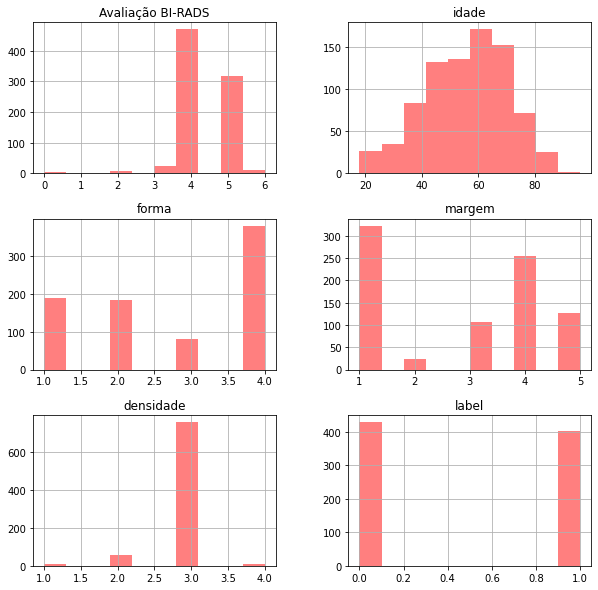

In [111]:
voice_data.hist(alpha=0.5, figsize=(10, 10), color='red')
plt.show()

Extrair informações de gênero (y) e recurso (x)

In [112]:
y = voice_data.label.values
x = voice_data.drop(["label"], axis = 1)
x = (x - x.min())/(x.max() - x.min()) # normalization

In [113]:
print(voice_data.shape)
print(x.shape)
print(y.shape)

(834, 6)
(834, 5)
(834,)


In [114]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(predictions, labels):
    N = labels.size
    mse = ((predictions - labels)**2).sum() / (2*N)
    
    return mse

def accuracy(predictions, labels):
    predicions_correct = predictions.argmax(axis=1) == labels.argmax(axis=1)
    accuracy = predicions_correct.mean()
    
    return accuracy

Dividir dados para fins de treinamento e teste

In [115]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 42)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)
N = y_train.size

In [116]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(417, 5)
(417, 1)
(417, 5)
(417, 1)


In [117]:
# hyperparameters
learning_rate = 0.1
epochs = 1000

n_input = 5 #Numero de Neurônios entrada (Muda de acordo com número total de dados (834) divido em treino e teste. Nesse caso são 417 dados em 5 colunas)
n_hidden = 5  #Numero de Neurônios da camada oculta (Podemos diminuir ou aumentar)
n_output = 1  #Numero de Neurônios da camada saída (Labels 0 ou 1).

# Criação dos pesos.
np.random.seed(10)
weights_1 = np.random.normal(scale=0.5, size=(n_input, n_hidden)) 
weights_2 = np.random.normal(scale=0.5, size=(n_hidden, n_output)) 

# Treinamento da RNA
monitoring = {"mean_squared_error": [], "accuracy": []}
for epoch in range(epochs):    
    
    # feedforward
    hidden_layer_inputs = np.dot(x_train, weights_1)
    hidden_layer_outputs = sigmoid(hidden_layer_inputs)

    output_layer_inputs = np.dot(hidden_layer_outputs, weights_2)
    output_layer_outputs = sigmoid(output_layer_inputs)
    
    
    # monitor training process
    mse = mean_squared_error(output_layer_outputs, y_train)
    acc = accuracy(output_layer_outputs, y_train)
    
    monitoring["mean_squared_error"].append(mse)
    monitoring["accuracy"].append(acc)
    
    
    # backpropagation
    output_layer_error = output_layer_outputs - y_train
    output_layer_delta = output_layer_error * output_layer_outputs * (1 - output_layer_outputs)

    hidden_layer_error = np.dot(output_layer_delta, weights_2.T)
    hidden_layer_delta = hidden_layer_error * hidden_layer_outputs * (1 - hidden_layer_outputs)

    
    # weight updates
    weights_2_update = np.dot(hidden_layer_outputs.T, output_layer_delta) / N
    weights_1_update = np.dot(x_train.T, hidden_layer_delta) / N

    weights_2 = weights_2 - learning_rate * weights_2_update
    weights_1 = weights_1 - learning_rate * weights_1_update

monitoring_df = pd.DataFrame(monitoring)

# Falta fazer um LOOP de acurácia e MSE para gerar o gráfico de acordo  com número de épocas. ⏰::

In [130]:
print("test accuracy: %{}".format(acc))
print("test MSE: %{}".format(mse))

test accuracy: %1.0
test MSE: %0.11436408436125692


In [118]:
print('Qtde de treino: {}'.format(x_train))
print('Qtde de teste: {}'.format(x_test))

#print(x_train.shape)
#print(y_train.shape)
#print(x_test.shape)
#print(y_test.shape)
print('***'*10)
#x_train.info()

Qtde de treino:      Avaliação BI-RADS     idade     forma  margem  densidade
307           0.500000  0.358974  0.666667    0.75   0.666667
310           0.833333  0.641026  1.000000    0.75   0.666667
638           0.833333  0.756410  0.666667    0.50   0.666667
46            0.833333  0.717949  0.000000    0.00   0.333333
349           0.833333  0.487179  0.333333    0.50   0.666667
..                 ...       ...       ...     ...        ...
71            0.666667  0.615385  0.000000    0.00   0.666667
106           0.666667  0.038462  0.333333    0.00   0.666667
270           0.666667  0.320513  0.000000    0.00   0.666667
435           0.666667  0.230769  0.666667    0.00   0.666667
102           0.666667  0.641026  0.000000    0.00   0.666667

[417 rows x 5 columns]
Qtde de teste:      Avaliação BI-RADS     idade     forma  margem  densidade
610           0.833333  0.602564  1.000000    0.75   0.666667
821           0.666667  0.461538  1.000000    0.75   0.666667
290           0

# *OUTROS CÓDIGOS PARA ESTUDO* PARA ANALISE E FORMATO EM PYTHON. ( DESCONSIDERAR ) 

Layer Artificial Neural Network (ANN) Construction
<a href="https://ibb.co/dGQUyV"><img src="https://preview.ibb.co/eRs9yV/im2.png" alt="im2" border="0"></a>

Crie peso e viés para rede neural de 3 camadas (2 camadas ocultas)

In [119]:
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    
    parameters = {"W1": np.random.randn(2,x_train.shape[0]) * 0.1,
                  "b1": np.zeros((2,1)),
                  "W2": np.random.randn(2,2) * 0.1,
                  "b2": np.zeros((2,1)),
                  "W3": np.random.randn(1,2) * 0.1,
                  "b3": np.zeros((1,1))}
    
    return parameters

parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

In [ ]:
print(parameters["W1"].shape)
print(parameters["W2"].shape)
print(parameters["W3"].shape)
print(parameters)

In [121]:
print(parameters["b1"].shape)
print(parameters["b2"].shape)
print(parameters["b3"].shape)

(2, 1)
(2, 1)
(1, 1)


## Sigmoid function :  sigmoid(x) = 1 / ( 1 + exp(-x) )

In [122]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

## Forward Propagation

In [123]:
def forward_propagation_NN(x_train, parameters):
    
    Z1 = np.dot(parameters["W1"],x_train) + parameters["b1"]
    A1 = sigmoid(Z1) # tanh is used as activation function 1
    Z2 = np.dot(parameters["W2"],A1) + parameters["b2"]
    A2 = sigmoid(Z2) # tanh is used as activation function 2
    Z3 = np.dot(parameters["W3"],A2) + parameters["b3"]
    A3 = sigmoid(Z3)

    cache = {"Z1": Z1,
             "A1": A1,
             "W1": parameters["W1"],
             "Z2": Z2,
             "A2": A2,
             "W2": parameters["W2"],
             "Z3": Z3,
             "A3": A3,
             "W3": parameters["W3"]}
    
    return A3, cache

A3, cache = forward_propagation_NN(x_train, parameters)

In [124]:
#cache


## Função de perda e função de custo
* As funções de perda e custo são as mesmas da regressão logística
* Função de entropia cruzada
<a href="https://imgbb.com/"><img src="https://image.ibb.co/nyR9LU/as.jpg" alt="as" border="0"></a><br />

Custo de computação

In [125]:
#def compute_cost_NN(A3, Y, parameters):
    
#    logprobs = np.multiply(np.log(A3),Y)
#    cost = -np.sum(logprobs)/Y.shape[1]
    
#    return cost

#cost = compute_cost_NN(A3, y_train, parameters)

In [126]:
def compute_cost_NN(A3, y_train, parameters):
  
  N = A3.size
  cost = ((y_train - A3)**2).sum() / (2*N)
  return cost;
cost = compute_cost_NN(A3, y_train, parameters)

O Black Propagation visa minimizar a função de custo ajustando os pesos e vieses da rede.O nível de ajuste é determinado pelos gradientes da função de custo em relação a esses parâmetros. https://towardsdatascience.com/understanding-backpropagation-algorithm-7bb3aa2f95fd

O derivado de uma função de custo mede a sensibilidade à alteração do valor da função (valor de saída) em relação a uma alteração em seu argumento x (valor de entrada). Em outras palavras, a derivada nos diz a direção C está indo.
O gradiente mostra o quanto o parâmetro x precisa mudar (na direção positiva ou negativa) para minimizar C.
Calcular esses gradientes acontece usando uma técnica chamada regra de cadeia.

## Backward Propagation with Gradient Decent

In [127]:
def backward_propagation_NN(parameters, cache, X, Y):
    
    dimension = X.shape[0] # é 5 caracteristicas para o nosso caso
    dZ3 = cache["A3"] - Y # d(cost)/d(Z3)
    dW3 = 1/dimension * np.dot(dZ3,cache["A2"].T) # d(cost)/d(W3)
    db3 = 1/dimension * np.sum(dZ3, axis=1, keepdims=True) # d(cost)/d(b3) e axis=0(col) e 1(lin)
    dZ2 = np.multiply(np.dot(dZ3.T, cache["W3"]).T , 1-np.power(cache["A2"],2)) # d(cost)/d(Z2)
    dW2 = 1/dimension * np.dot(cache["A1"], dZ2.T) # d(cost)/d(W2)
    db2 = 1/dimension * np.sum(dZ2, axis=1, keepdims=True) # d(cost)/d(b2)
    dZ1 = np.multiply(np.dot(dZ2.T, cache["W2"].T).T,1-np.power(cache["A1"],2)) # d(cost)/d(Z1)
    dW1 = 1/dimension * np.dot(dZ1, X.T) # d(cost)/d(W1)
    db1 = 1/dimension * np.sum(dZ1,axis=1, keepdims=True) # d(cost)/d(b1)
    grads = {'dW3':dW3, 
             'db3':db3,
             'dW2':dW2,
             'db2':db2,
             'dW1':dW1,
             'db1':db1}
    
    return grads

grads = backward_propagation_NN(parameters, cache, x_train, y_train)

ValueError: ignored

In [ ]:
#print(grads)
#print(grads["dW3"].shape)
print(grads["dW1"])
print(grads["dW1"].shape)


##  Defina a taxa de aprendizado
A quantidade que os pesos são atualizados durante o treinamento é referida como o tamanho da etapa ou a "taxa de aprendizagem".

A taxa de aprendizagem controla a rapidez com que o modelo é adaptado ao problema. Taxas de aprendizagem menores exigem mais épocas de treinamento, dadas as pequenas mudanças feitas nos pesos a cada atualização, enquanto taxas de aprendizagem maiores resultam em mudanças rápidas e requerem menos épocas de treinamento.

In [ ]:
Learning_Rate = 0.1

## Update weight and bias

In [ ]:
def update_parameters_NN(parameters, grads, learning_rate = Learning_Rate):
    parameters = {"W1": parameters["W1"]-learning_rate*grads["dW1"],
                  "b1": parameters["b1"]-learning_rate*grads["db1"],
                  "W2": parameters["W2"]-learning_rate*grads["dW2"],
                  "b2": parameters["b2"]-learning_rate*grads["db2"],
                  "W3": parameters["W3"]-learning_rate*grads["dW3"],
                  "b3": parameters["b3"]-learning_rate*grads["db3"]}
    
    return parameters

parameters = update_parameters_NN(parameters, grads, learning_rate = Learning_Rate)

In [ ]:
parameters

## Preveja os dados de teste com peso e viés atualizados (com parâmetros atualizados)

In [ ]:
def predict_NN(parameters,x_test):
    # x_test é a entrada para propagação direta
    A3, cache = forward_propagation_NN(x_test,parameters)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(A3.shape[1]):
        if A3[0,i]<= 0.5: # if smaller than 0.5, predict it as 0
            Y_prediction[0,i] = 0
        else: # if greater than 0.5, predict it as 1
            Y_prediction[0,i] = 1

    return Y_prediction

Y_prediction = predict_NN(parameters,x_test)

In [ ]:
#Y_prediction

Criar modelo de rede neural de 3 camadas

In [ ]:
def three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations):
    cost_list = []
    index_list = []
    
    #initialize parâmetros e tamanhos de camada
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
        # forward propagation
        A3, cache = forward_propagation_NN(x_train,parameters)
        # calcular custo
        cost = compute_cost_NN(A3, y_train, parameters)
        # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
        # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 50 == 0: # para visualizar dados em cada 100 iterações
            cost_list.append(cost)
            index_list.append(i)

    figure(num=None, figsize=(10, 6), dpi=90, facecolor='w', edgecolor='k')
    plt.plot(index_list,cost_list)
    plt.xticks(index_list,rotation='vertical')
    plt.xlabel("Números de Épocas", fontsize = 14)
    plt.ylabel("MSE", fontsize = 14)
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters,x_test)
    y_prediction_train = predict_NN(parameters,x_train)

    # Print train/test Accuracies
    print("train accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100,3)))
    print("test accuracy: %{}".format(round(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100,3)))
    return parameters

parameters = three_layer_neural_network(x_train, y_train,x_test,y_test, num_iterations=15000)